<a href="https://colab.research.google.com/github/CezarMontenegro/concrete_strength_prediction/blob/main/concrete_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Concrete Strength Prediction**

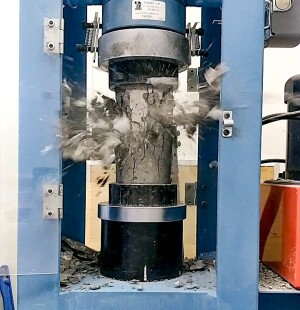


### **Resistência à compressão do concreto**

A resistência à compressão do concreto é conhecida como Fck — uma sigla que em inglês significa Feature Compression Know (em português significa resistência característica do concreto à compressão). Ela é medida em megapascal (MPa), e cada 1 mpa corresponde a uma resistência aproximada de 10 kgf/cm².

O Fck indica, portanto, a qual tensão o concreto tem capacidade de resistir. Essa tensão é a resultante da divisão entre a força e a área em que ela atuará. Dessa forma, os testes de resistência no concreto possibilitam confirmar a tensão máxima a que ele resistirá antes de sofrer ruptura.

O concreto e formado por 5 principais componentes: agregado miúdo, agregado graúdo, cimento, água e aditivos, a resitência final a compressão sera definida pelo tipo e as quantidade desses componentes adicionados a mistura, sabemos também que o concreto se torna mais resistente a compressão conforme o tempo passa.

&nbsp;


Neste projeto irei fazer uma análise dos dados coletados e criar um modelo que irá prever a resistencia a compressão de amostras de concreto de acordo com sua composição e idade.







# **1.0 Importando Bibliotecas e Dataset**

In [789]:
# Importando bibliotecas de análise/visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [790]:
# Importando base de dados
concrete_db = pd.read_csv('Concrete.csv')

## **2.0 Limpeza/Tratamento dos dados**

In [791]:
concrete_db


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [792]:
concrete_db.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [793]:
concrete_db.duplicated().sum()

25

In [794]:
concrete_db.drop_duplicates(keep='first', inplace=True)

In [795]:
concrete_db.nunique()

cement              278
slag                185
flyash              156
water               195
superplasticizer    111
coarseaggregate     284
fineaggregate       302
age                  14
csMPa               845
dtype: int64

## **3.0 Análise exploratória dos dados**

In [796]:
# Breve análise estatistica do dataset
concrete_db.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


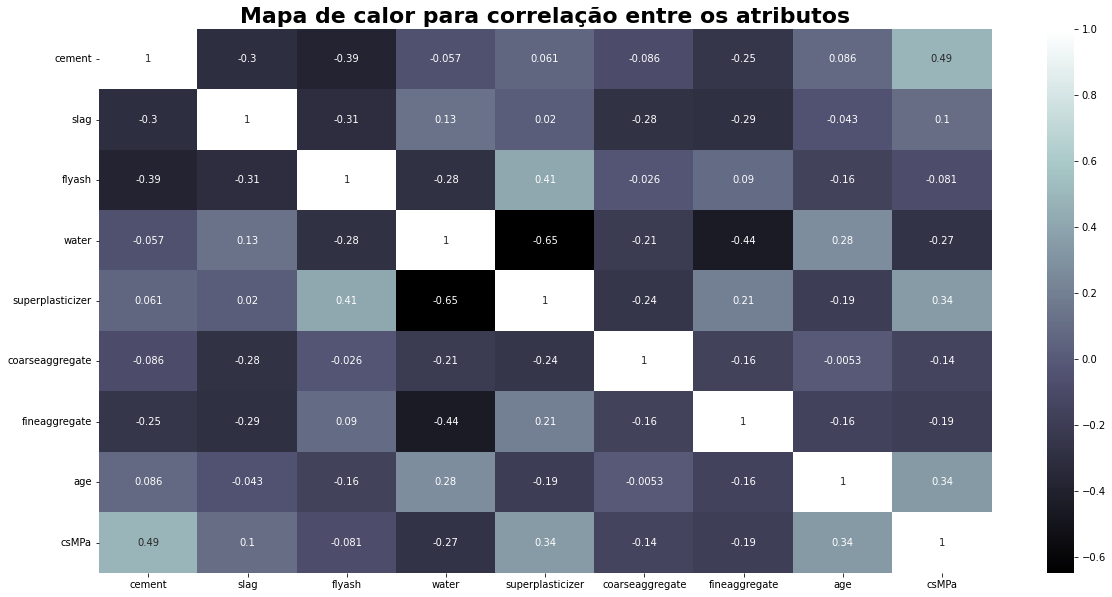

In [797]:
# Análise de correlaçào entre os atributos
plt.figure(figsize=(20,10))
plt.title('Mapa de calor para correlação entre os atributos', fontsize=22, fontweight=600)
sns.heatmap(concrete_db.corr(), annot=True, cmap='bone');

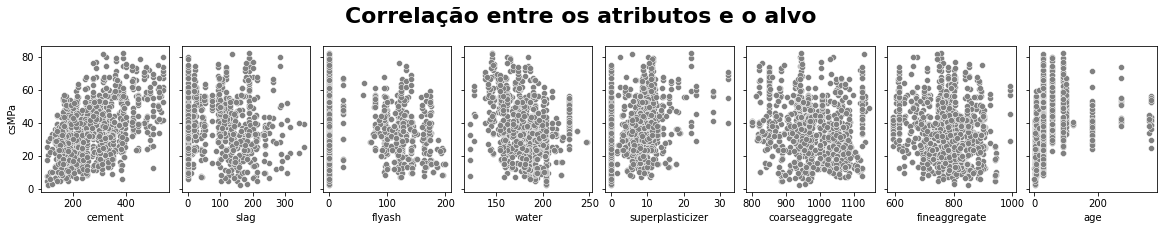

In [798]:
figure = plt.subplots(1,8, sharey=True, figsize=(20,3))

plt.suptitle('Correlação entre os atributos e o alvo', fontsize=22, fontweight=600)

plt.subplot(1, 8, 1)
plot = sns.scatterplot(data=concrete_db, x='cement', y='csMPa', color='gray')

position = 2
for column in concrete_db.columns[1:]:
  plt.subplot(1, 8, position)
  plot = sns.scatterplot(data=concrete_db, x=column, y='csMPa', color='gray')
  plot.set(yticklabels=[])
  plot.set(ylabel='')
  position += 1

  if position >= 9:
    break

plt.subplots_adjust(top=0.80, wspace=.1)

Analisando os gráficos de dispersão acima, vemos que temo uma correlação positiva fraca entre o cimento e o Fck do concreto, não é possivel ver uma correlação linear nos outros atributos

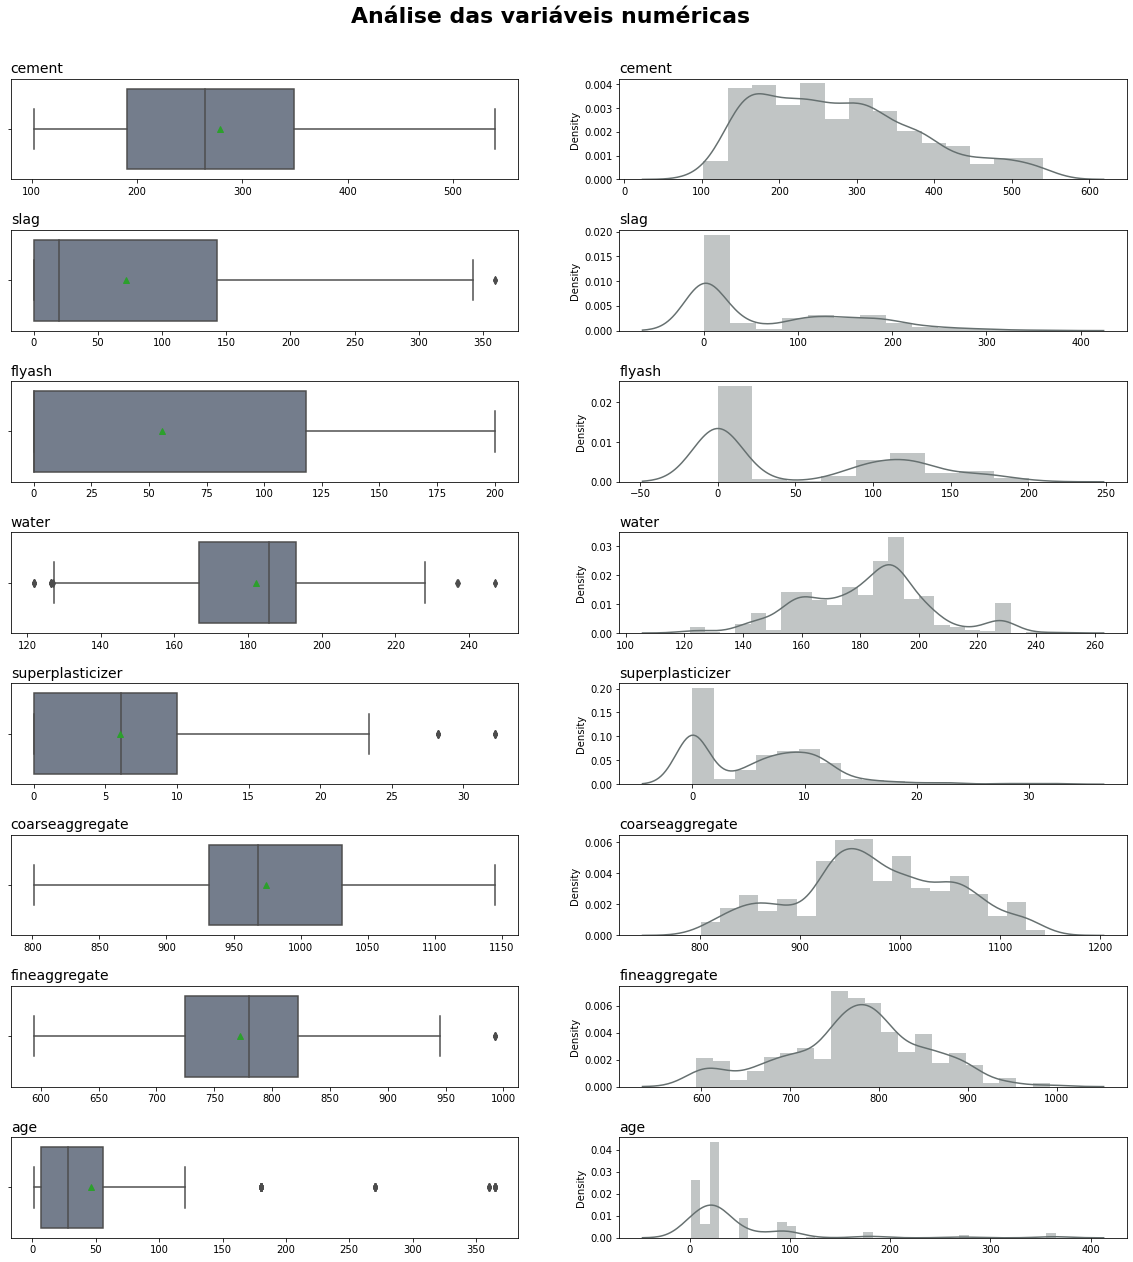

In [799]:
figure = plt.subplots(figsize=(20,20));
plt.suptitle('Análise das variáveis numéricas', fontsize=22, fontweight=600);

position = 1

for column in concrete_db.columns:
  plt.subplot(8, 2, position)
  plt.title(column, loc='left', fontsize=14, fontweight=200)
  plot = sns.boxplot(data=concrete_db, x=column, showmeans=True, palette='bone');
  plot.set(xlabel='')
  position += 1

  plt.subplot(8, 2, position)
  plt.title(column, loc='left', fontsize=14, fontweight=200);
  plot = sns.distplot(concrete_db[column], color='#667070')
  plot.set(xlabel='')
  position += 1

  if position >= 17:
    break

plt.subplots_adjust(top=.93, hspace=.5)

## **4.0 Pré-processamento dos dados**

In [800]:
# Criação dos vetores previsores e alvo
X_concrete = concrete_db.iloc[:, :-1].values
y_concrete = concrete_db.iloc[:, -1].values

In [801]:
# Transformando coluna alvo em matriz
y_concrete = y_concrete.reshape(-1,1)

In [802]:
# Importando biblioteca de separaçao de dados treino / teste
from sklearn.model_selection import train_test_split

X_concrete_train, X_concrete_test, y_concrete_train, y_concrete_test = train_test_split(X_concrete, y_concrete, test_size=0.2, random_state=0)

## **5.0 Seleção do modelo**

Será usado a classe RandomizedSearchCV do Scikit Learn em diversos modelos de regressão para definir qual modelo se ajusta melhor ao conjunto de dados.

In [803]:
# Importando biblioteca de tunagem dos hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV

# Importando bibliotecas de avaliação de erro do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [804]:
# Criando um dicionário que irá armazenar o erro (mae) em cada modelo
errors = {}

### **Regressão Linear Multipla**

In [805]:
parameter = {}

In [806]:
# Importando modelo regressão linear
from sklearn.linear_model import LinearRegression

# Instanciando modelo
multiple_regressor_cv = RandomizedSearchCV(LinearRegression(), param_distributions=parameter)

# Treinando modelo
multiple_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=LinearRegression(), param_distributions={})

In [807]:
# Mostrando o Coeficiente de determinação R2
multiple_regressor_cv.score(X_concrete_train, y_concrete_train)

0.5936006956578543

In [808]:
# Realizando Predições
predictions = multiple_regressor_cv.predict(X_concrete_test)

In [809]:
# Erro absoluto médio (MAE)
mae_linear_multipla = mean_absolute_error(y_concrete_test, predictions)
mae_linear_multipla

7.796420686743918

In [810]:
# Adicionando o erro medio ao dicionario de erros
errors['Regressao Linear Multipla'] = [round(mae_linear_multipla)]

### **Regressão polinomial**

In [811]:
# Importando transformador Polynomial
from sklearn.preprocessing import PolynomialFeatures

# Instanciando transformador Polynomial
X_concrete_poly = PolynomialFeatures(degree = 3)
X_concrete_train_poly = PolynomialFeatures(degree = 3)
X_concrete_test_poly = PolynomialFeatures(degree = 3)

# Transformando dados simples em polynomiais
X_concrete_polyed = X_concrete_poly.fit_transform(X_concrete)
X_concrete_train_polyed = X_concrete_train_poly.fit_transform(X_concrete_train)
X_concrete_test_polyed = X_concrete_test_poly.fit_transform(X_concrete_test)

In [812]:
# Instanciando modelo
regressor_concrete_poly = RandomizedSearchCV(LinearRegression(), param_distributions=parameter)

# Treinando modelo com dados polynomias
regressor_concrete_poly.fit(X_concrete_polyed, y_concrete)

RandomizedSearchCV(estimator=LinearRegression(), param_distributions={})

In [813]:
# Coeficiente de determinacao (R2) do modelo
regressor_concrete_poly.score(X_concrete_train_polyed, y_concrete_train)

0.9221503922027527

In [814]:
# Realizando predições
predictions_poly = regressor_concrete_poly.predict(X_concrete_test_polyed)

In [815]:
# MAE
mae_polynomial = mean_absolute_error(y_concrete_test, predictions_poly)
mae_polynomial

3.453790690850316

In [816]:
# Adicionando o erro medio ao dicionario de erros
errors['Regressão Polynomial'] = [round(mae_polynomial,2)]

### **Regressão com Árvores de Decisão**

In [817]:
# Definindo parametro para Cross Validation
tree_parameters = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter': ['best', 'random'],
  'max_depth': [1, 5, 10, 20, 50, 100],
  'min_samples_split': [2, 4, 8, 16, 32, 64, 100],
  'min_samples_leaf': [2, 4, 8, 16, 32, 64, 100]
}

In [818]:
# Importando modelo regressão linear
from sklearn.tree import DecisionTreeRegressor

# Instanciando modelo
tree_regressor_cv = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=tree_parameters)

# Treinando modelo
tree_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 5, 10, 20, 50, 100],
                                        'min_samples_leaf': [2, 4, 8, 16, 32,
                                                             64, 100],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64, 100],
                                        'splitter': ['best', 'random']})

In [819]:
# Mostrando melhores hiperparâmetros
best_params =tree_regressor_cv.best_params_
print(best_params)

{'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'friedman_mse'}


In [820]:
# Instanciando modelo
tree_regressor = DecisionTreeRegressor(splitter='best', min_samples_split=16, min_samples_leaf=8, max_depth=100, criterion='friedman_mse')

tree_regressor.fit(X_concrete_train, y_concrete_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=100,
                      min_samples_leaf=8, min_samples_split=16)

In [821]:
# Mostrando o Coeficiente de determinação R2
tree_regressor.score(X_concrete_train, y_concrete_train)

0.8926560874436518

In [822]:
# Realizando Predições
tree_predictions = multiple_regressor_cv.predict(X_concrete_test)

In [823]:
# Erro absoluto médio (MAE)
mae_arvore = mean_absolute_error(y_concrete_test, tree_predictions)
mae_arvore

7.796420686743918

In [824]:
# Adicionando o erro medio ao dicionario de erros
errors['Regressão Árvore de Decisão'] = [round(mae_arvore,2)]

### **Regressão com Random Forest**

In [825]:
# Definindo parametro para Cross Validation
forest_parameters = {
  'criterion': ['squared_error', 'absolute_error', 'poisson'],
  'max_depth': [1, 5, 10, 20, 50, 100],
  'min_samples_split': [2, 4, 8, 16, 32, 64, 100],
  'min_samples_leaf': [2, 4, 8, 16, 32, 64, 100]
}

In [826]:
# Importando modelo regressão linear
from sklearn.ensemble import RandomForestRegressor

# Instanciando modelo
forest_regressor_cv = RandomizedSearchCV(RandomForestRegressor(), param_distributions=forest_parameters)

# Treinando modelo
forest_regressor_cv.fit(X_concrete, y_concrete)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 5, 10, 20, 50, 100],
                                        'min_samples_leaf': [2, 4, 8, 16, 32,
                                                             64, 100],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64, 100]})

In [827]:
best_params =forest_regressor_cv.best_params_
print(best_params)

{'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 50, 'criterion': 'squared_error'}


In [828]:
# Instanciando modelo
forest_regressor = RandomForestRegressor(min_samples_split=32, min_samples_leaf=2, max_depth=5, criterion='absolute_error')

forest_regressor.fit(X_concrete_train, y_concrete_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=32)

In [829]:
# Mostrando o Coeficiente de determinação R2
forest_regressor.score(X_concrete_train, y_concrete_train)

0.8210902363785398

In [830]:
# Realizando Predições
forest_predictions = forest_regressor.predict(X_concrete_test)

In [831]:
# Erro absoluto médio (MAE)
mae_forest = mean_absolute_error(y_concrete_test, forest_predictions)
mae_forest

6.264935323383084

In [832]:
# Adicionando o erro medio ao dicionario de erros
errors['Regressão Random Forest'] = [round(mae_forest, 2)]

### **Regressão com SVM**

In [833]:
# Importando biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

# Instanciando StandardScaler()
X_scaler = StandardScaler()
X_scaler_train = StandardScaler()
X_scaler_test = StandardScaler()
y_scaler = StandardScaler()
y_scaler_train = StandardScaler()
y_scaler_test = StandardScaler()

# Padronizando dados
X_concrete_scaled = X_scaler.fit_transform(X_concrete)
y_concrete_scaled = y_scaler.fit_transform(y_concrete)
X_concrete_scaled_train = X_scaler_train.fit_transform(X_concrete_train)
X_concrete_scaled_test = X_scaler_test.fit_transform(X_concrete_test)
y_concrete_scaled_train = y_scaler_train.fit_transform(y_concrete_train)
y_concrete_scaled_test = y_scaler_test.fit_transform(y_concrete_test)

In [834]:
SVR_parameters = {
  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': [1,2,3,4,5,6,7,8,9,10],
  'gamma': ['scale', 'auto'],
  'C': [1,2,3,4,5,6,7,8,9,10]
}

In [835]:
# Importando modelo regressão linear
from sklearn.svm import SVR

# Instanciando modelo
SVR_regressor = RandomizedSearchCV(SVR(), param_distributions=SVR_parameters)

# Treinando modelo
SVR_regressor.fit(X_concrete_scaled, y_concrete_scaled)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [836]:
best_params = SVR_regressor.best_params_
print(best_params)

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 3}


In [837]:
# Instanciando modelo e setando os melhores parametros
SVR_regressor = SVR(kernel='rbf', gamma='auto', degree=1, C=1)

SVR_regressor.fit(X_concrete_scaled_train, y_concrete_scaled_train)

SVR(C=1, degree=1, gamma='auto')

In [838]:
# Mostrando o Coeficiente de determinação R2
SVR_regressor.score(X_concrete_scaled_train, y_concrete_scaled_train)

0.8726226942556201

In [839]:
# Realizando Predições
SVR_predictions = forest_regressor.predict(X_concrete_scaled_test)

In [840]:
# Erro absoluto médio (MAE)
mae_svm = mean_absolute_error(y_concrete_scaled_test, SVR_predictions)
mae_svm

14.889285820895516

In [841]:
# Adicionando o erro medio ao dicionario de erros
errors['Regressão com SVM'] = [round(mae_svm, 2)]

### **Escolha do modelo**

[[]]

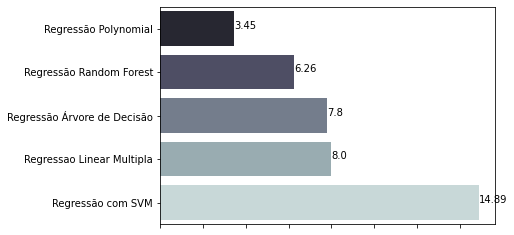

In [862]:
errors_df = pd.DataFrame(errors)
plot = sns.barplot(data=errors_df, orient='h', palette='bone', order=['Regressão Polynomial', 'Regressão Random Forest', 'Regressão Árvore de Decisão', 'Regressao Linear Multipla', 'Regressão com SVM']);
for i in plot.patches:
  plot.annotate(i.get_width(), (i.get_width(), i.get_y() + i.get_height() / 2))
plot.set(xticklabels='')

No gráfico acima vemos observamos através do erro absoluto medio (MAE) que o modelo de Regressão Polynomial foi o que melhor se ajustou ao conjunto de dados e é ele que usaremos para fazer as predições.

## **Criação do modelo Regressão Polynomial**

In [843]:
# Instanciando transformador Polynomial
X_concrete_train_poly = PolynomialFeatures(degree = 3)
X_concrete_test_poly = PolynomialFeatures(degree = 3)

# Transformando dados simples em polynomiais
X_concrete_train_polyed = X_concrete_train_poly.fit_transform(X_concrete_train)
X_concrete_test_polyed = X_concrete_test_poly.fit_transform(X_concrete_test)

In [844]:
# Instanciando modelo
regressor_concrete_poly = RandomizedSearchCV(LinearRegression(), param_distributions=parameter)

# Treinando modelo com dados polynomias
regressor_concrete_poly.fit(X_concrete_train_polyed, y_concrete_train)

RandomizedSearchCV(estimator=LinearRegression(), param_distributions={})

In [845]:
# Coeficiente de determinacao do modelo
regressor_concrete_poly.score(X_concrete_train_polyed, y_concrete_train)

0.9254742933167187

In [846]:
# Realizando predições
predictions_poly = regressor_concrete_poly.predict(X_concrete_test_polyed)

In [847]:
# MAE
mean_absolute_error(y_concrete_test, predictions_poly)

4.201941970232941